# Import Helper Functions 

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-03-12 06:00:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-03-12 06:00:05 (51.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir,

# Get the data

In [5]:
help(unzip_data)

Help on function unzip_data in module helper_functions:

unzip_data(filename)
    Unzips filename into the current working directory.
    
    Args:
      filename (str): a filepath to a target zip folder to be unzipped.



In [3]:
unzip_data('coke_and_pepsi_all_images.zip')

In [4]:
help(walk_through_dir)

Help on function walk_through_dir in module helper_functions:

walk_through_dir(dir_path)
    Walks through dir_path returning its contents.
    
    Args:
      dir_path (str): target directory
    
    Returns:
      A print out of:
        number of subdiretories in dir_path
        number of images (files) in each subdirectory
        name of each subdirectory



In [5]:
walk_through_dir('coke_and_pepsi_all_images')

There are 2 directories and 0 images in 'coke_and_pepsi_all_images'.
There are 2 directories and 0 images in 'coke_and_pepsi_all_images/Test'.
There are 0 directories and 20 images in 'coke_and_pepsi_all_images/Test/coca_cola'.
There are 0 directories and 20 images in 'coke_and_pepsi_all_images/Test/Pepsi'.
There are 2 directories and 0 images in 'coke_and_pepsi_all_images/Train'.
There are 0 directories and 100 images in 'coke_and_pepsi_all_images/Train/coca_cola'.
There are 0 directories and 98 images in 'coke_and_pepsi_all_images/Train/pepsi'.


In [9]:
!dir coke_and_pepsi_all_images/Train/coca_cola

IMG001.jpg  IMG018.jpg	IMG035.jpg  IMG052.jpg	IMG069.jpg  IMG086.jpg
IMG002.jpg  IMG019.jpg	IMG036.jpg  IMG053.jpg	IMG070.jpg  IMG087.jpg
IMG003.jpg  IMG020.jpg	IMG037.jpg  IMG054.jpg	IMG071.jpg  IMG088.jpg
IMG004.jpg  IMG021.jpg	IMG038.jpg  IMG055.jpg	IMG072.jpg  IMG089.jpg
IMG005.jpg  IMG022.jpg	IMG039.jpg  IMG056.jpg	IMG073.jpg  IMG090.jpg
IMG006.jpg  IMG023.jpg	IMG040.jpg  IMG057.jpg	IMG074.jpg  IMG091.jpg
IMG007.jpg  IMG024.jpg	IMG041.jpg  IMG058.jpg	IMG075.jpg  IMG092.jpg
IMG008.jpg  IMG025.jpg	IMG042.jpg  IMG059.jpg	IMG076.jpg  IMG093.jpg
IMG009.jpg  IMG026.jpg	IMG043.jpg  IMG060.jpg	IMG077.jpg  IMG094.jpg
IMG010.jpg  IMG027.jpg	IMG044.jpg  IMG061.jpg	IMG078.jpg  IMG095.jpg
IMG011.jpg  IMG028.jpg	IMG045.jpg  IMG062.jpg	IMG079.jpg  IMG096.jpg
IMG012.jpg  IMG029.jpg	IMG046.jpg  IMG063.jpg	IMG080.jpg  IMG097.jpg
IMG013.jpg  IMG030.jpg	IMG047.jpg  IMG064.jpg	IMG081.jpg  IMG098.jpg
IMG014.jpg  IMG031.jpg	IMG048.jpg  IMG065.jpg	IMG082.jpg  IMG099.jpg
IMG015.jpg  IMG032.jpg	IMG049.jpg 

In [55]:
# Create training and testing directories 
train_dir = 'coke_and_pepsi_all_images/Train'
test_dir = 'coke_and_pepsi_all_images/Test'


# View some of the data with a random image generator function

In [13]:
import random 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import os 

# View some random images 
def view_random_image(target_dir: str, target_class: str):
  """
  Takes a random sample from a specified directory of images 
  and plots the image along with the image name, image shape and 
  numpy array form of the image. 

  Args:
    target_dir: The name of the directory that should be specified with
    either 'train' or 'test'.
  target_class: The name of the class to be used.

  Returns:
    A matplotlib image 
  
  """
  # Set the target direcotories to use
  target_folder = target_dir + target_class

  # Get a random image path 
  random_image = random.sample(os.listdir(target_folder), 1) 
  print(random_image)

  # Load in an image
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  # Print the shape of the image
  print(f'Image Shape ={img.shape}')

  return img 

['IMG076.jpg']
Image Shape =(4166, 2470, 3)


array([[[127, 126, 122],
        [127, 126, 122],
        [127, 126, 122],
        ...,
        [134, 134, 126],
        [134, 134, 126],
        [134, 134, 126]],

       [[126, 125, 121],
        [126, 125, 121],
        [127, 126, 122],
        ...,
        [134, 134, 126],
        [134, 134, 126],
        [134, 134, 126]],

       [[126, 125, 121],
        [126, 125, 121],
        [126, 125, 121],
        ...,
        [134, 134, 126],
        [134, 134, 126],
        [134, 134, 126]],

       ...,

       [[243, 243, 243],
        [242, 242, 242],
        [242, 242, 242],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[243, 243, 243],
        [242, 242, 242],
        [242, 242, 242],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[243, 243, 243],
        [242, 242, 242],
        [242, 242, 242],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]]

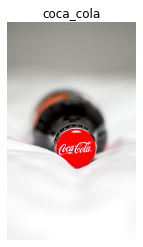

In [15]:
view_random_image(target_dir='coke_and_pepsi_all_images/Train/', target_class='coca_cola')

['IMG006.jpg']
Image Shape =(3024, 4032, 3)


array([[[175, 175, 175],
        [177, 177, 177],
        [179, 179, 179],
        ...,
        [185, 180, 176],
        [184, 179, 175],
        [182, 177, 174]],

       [[178, 178, 178],
        [178, 178, 178],
        [177, 177, 175],
        ...,
        [184, 179, 175],
        [182, 177, 173],
        [178, 173, 169]],

       [[179, 179, 177],
        [179, 179, 177],
        [178, 178, 176],
        ...,
        [179, 174, 170],
        [180, 175, 171],
        [179, 174, 170]],

       ...,

       [[213, 212, 208],
        [217, 216, 212],
        [215, 214, 210],
        ...,
        [218, 217, 213],
        [216, 215, 211],
        [212, 211, 207]],

       [[216, 215, 211],
        [216, 215, 211],
        [214, 213, 209],
        ...,
        [220, 219, 215],
        [217, 216, 212],
        [213, 212, 208]],

       [[217, 216, 212],
        [213, 212, 208],
        [210, 209, 205],
        ...,
        [214, 213, 209],
        [215, 214, 210],
        [218, 217, 213]]

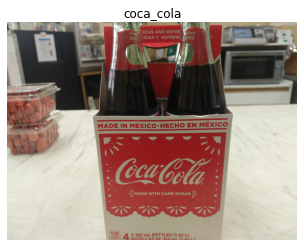

In [17]:
view_random_image(target_dir='coke_and_pepsi_all_images/Train/', target_class='coca_cola')

['IMG099.jpg']
Image Shape =(404, 612, 3)


array([[[196,  47,  40],
        [202,  53,  46],
        [191,  40,  33],
        ...,
        [176,  58,  56],
        [177,  59,  57],
        [178,  60,  58]],

       [[219,  70,  63],
        [224,  73,  66],
        [207,  56,  49],
        ...,
        [173,  55,  53],
        [174,  56,  54],
        [174,  56,  54]],

       [[225,  74,  67],
        [228,  77,  70],
        [211,  58,  52],
        ...,
        [171,  51,  50],
        [171,  51,  50],
        [171,  51,  50]],

       ...,

       [[193,  21,  17],
        [193,  21,  17],
        [193,  21,  17],
        ...,
        [210,  69,  59],
        [205,  64,  54],
        [188,  52,  40]],

       [[193,  21,  17],
        [193,  21,  17],
        [193,  21,  17],
        ...,
        [210,  69,  59],
        [205,  64,  54],
        [188,  52,  40]],

       [[192,  20,  16],
        [192,  20,  16],
        [193,  21,  17],
        ...,
        [210,  69,  59],
        [205,  64,  54],
        [188,  52,  40]]

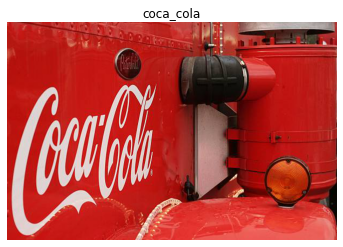

In [18]:
view_random_image(target_dir='coke_and_pepsi_all_images/Train/', target_class='coca_cola')

['IMG065.jpg']
Image Shape =(2879, 1919, 3)


array([[[119,  49,  49],
        [119,  49,  49],
        [120,  50,  50],
        ...,
        [172, 125, 133],
        [171, 124, 132],
        [171, 124, 132]],

       [[119,  49,  49],
        [119,  49,  49],
        [120,  50,  50],
        ...,
        [172, 125, 133],
        [171, 124, 132],
        [171, 124, 132]],

       [[119,  49,  49],
        [119,  49,  49],
        [120,  50,  50],
        ...,
        [172, 125, 133],
        [171, 124, 132],
        [171, 124, 132]],

       ...,

       [[ 96,  32,  23],
        [ 96,  32,  23],
        [ 97,  33,  24],
        ...,
        [ 72,  25,  17],
        [ 72,  25,  17],
        [ 72,  25,  17]],

       [[ 95,  31,  22],
        [ 95,  31,  22],
        [ 97,  33,  24],
        ...,
        [ 63,  16,   8],
        [ 63,  16,   8],
        [ 63,  16,   8]],

       [[ 95,  31,  22],
        [ 96,  32,  23],
        [ 97,  33,  24],
        ...,
        [ 58,  11,   3],
        [ 58,  11,   3],
        [ 58,  11,   3]]

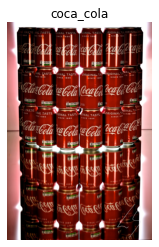

In [19]:
view_random_image(target_dir='coke_and_pepsi_all_images/Train/', target_class='coca_cola')

['IMG013.jpg']
Image Shape =(243, 208, 3)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

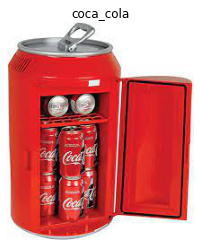

In [20]:
view_random_image(target_dir='coke_and_pepsi_all_images/Train/', target_class='coca_cola')

['IMG044.jpg']
Image Shape =(241, 304, 3)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

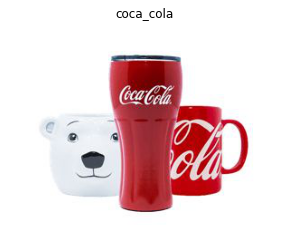

In [28]:
view_random_image(target_dir='coke_and_pepsi_all_images/Train/', target_class='coca_cola')

['IMG014.jpg']
Image Shape =(229, 220, 3)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

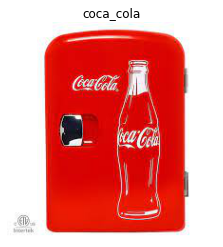

In [29]:
view_random_image(target_dir='coke_and_pepsi_all_images/Train/', target_class='coca_cola')

['IMG052.jpg']
Image Shape =(281, 500, 3)


array([[[206,   4,   2],
        [206,   4,   2],
        [206,   4,   2],
        ...,
        [185,  20,  18],
        [187,  19,  18],
        [187,  19,  18]],

       [[202,   3,   0],
        [202,   3,   0],
        [202,   3,   0],
        ...,
        [173,  19,  11],
        [173,  19,  11],
        [173,  19,  11]],

       [[201,   2,   0],
        [201,   2,   0],
        [201,   2,   0],
        ...,
        [177,  26,  15],
        [177,  26,  15],
        [177,  26,  15]],

       ...,

       [[ 11,   8,   3],
        [ 12,   9,   4],
        [ 10,   7,   2],
        ...,
        [210,  23,   8],
        [207,  32,  13],
        [206,  41,  21]],

       [[ 20,  17,  12],
        [ 12,   9,   4],
        [  3,   0,   0],
        ...,
        [198,  51,  33],
        [210,  78,  57],
        [223, 102,  81]],

       [[ 15,  14,   9],
        [ 10,   9,   4],
        [  6,   5,   0],
        ...,
        [227, 114,  96],
        [230, 134, 112],
        [219, 137, 113]]

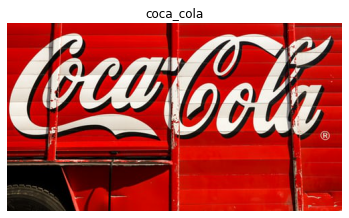

In [30]:
view_random_image(target_dir='coke_and_pepsi_all_images/Train/', target_class='coca_cola')

['IMG072.jpg']
Image Shape =(267, 189, 3)


array([[[  0,  12, 120],
        [  0,  12, 120],
        [  0,  12, 120],
        ...,
        [  0,  11, 117],
        [  0,  11, 117],
        [  0,  11, 117]],

       [[  0,  12, 120],
        [  0,  12, 120],
        [  0,  12, 120],
        ...,
        [  0,  11, 117],
        [  0,  11, 117],
        [  0,  11, 117]],

       [[  0,  12, 120],
        [  0,  12, 120],
        [  0,  12, 120],
        ...,
        [  0,  11, 117],
        [  0,  11, 117],
        [  0,  11, 117]],

       ...,

       [[  0,  21, 143],
        [  0,  21, 143],
        [  0,  20, 145],
        ...,
        [  0,  11, 111],
        [  0,  11, 109],
        [  1,  11, 109]],

       [[  0,  20, 143],
        [  0,  20, 143],
        [  0,  20, 145],
        ...,
        [  1,  10, 111],
        [  1,  10, 111],
        [  1,  11, 109]],

       [[  0,  20, 143],
        [  0,  20, 143],
        [  0,  20, 145],
        ...,
        [  1,  10, 111],
        [  2,  10, 111],
        [  2,  10, 111]]

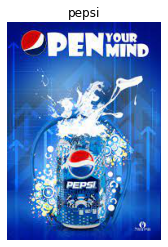

In [16]:
view_random_image(target_dir='coke_and_pepsi_all_images/Train/', target_class='pepsi')

['IMG073.jpg']
Image Shape =(267, 189, 3)


array([[[232, 229, 222],
        [232, 229, 222],
        [233, 230, 223],
        ...,
        [234, 230, 227],
        [235, 230, 226],
        [235, 230, 226]],

       [[251, 248, 241],
        [252, 249, 242],
        [252, 249, 242],
        ...,
        [234, 230, 227],
        [235, 230, 226],
        [235, 230, 226]],

       [[248, 245, 240],
        [249, 246, 241],
        [249, 246, 241],
        ...,
        [234, 230, 227],
        [235, 230, 226],
        [235, 230, 226]],

       ...,

       [[191, 189, 176],
        [223, 221, 209],
        [223, 220, 211],
        ...,
        [220, 220, 212],
        [255, 255, 251],
        [254, 254, 252]],

       [[191, 189, 176],
        [223, 221, 208],
        [223, 221, 209],
        ...,
        [220, 220, 212],
        [255, 255, 250],
        [254, 254, 252]],

       [[191, 189, 176],
        [223, 221, 208],
        [223, 221, 209],
        ...,
        [220, 220, 210],
        [255, 255, 250],
        [254, 255, 250]]

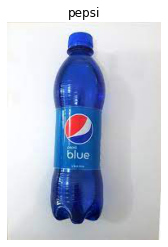

In [21]:
view_random_image(target_dir='coke_and_pepsi_all_images/Train/', target_class='pepsi')

['IMG090.jpg']
Image Shape =(1000, 2000, 3)


array([[[255, 250,  12],
        [255, 247,  12],
        [255, 248,  22],
        ...,
        [255, 227,   4],
        [255, 227,   7],
        [255, 218,   0]],

       [[255, 249,  12],
        [255, 245,  13],
        [255, 246,  20],
        ...,
        [255, 228,   7],
        [255, 224,   4],
        [255, 215,   0]],

       [[255, 249,  14],
        [255, 244,  14],
        [253, 244,  19],
        ...,
        [255, 227,   6],
        [255, 221,   2],
        [252, 212,   0]],

       ...,

       [[255, 244,   1],
        [255, 241,   1],
        [253, 236,   0],
        ...,
        [158, 111,   0],
        [151, 105,   0],
        [145,  99,   0]],

       [[255, 241,   0],
        [255, 238,   0],
        [252, 235,   0],
        ...,
        [177, 132,   7],
        [170, 125,   0],
        [159, 115,   0]],

       [[250, 234,   0],
        [254, 238,   0],
        [255, 241,   3],
        ...,
        [213, 169,  38],
        [206, 163,  25],
        [194, 151,  12]]

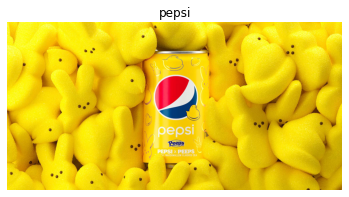

In [22]:
view_random_image(target_dir='coke_and_pepsi_all_images/Train/', target_class='pepsi')

['IMG056.jpg']
Image Shape =(225, 225, 3)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

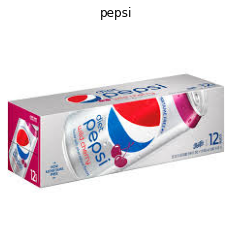

In [23]:
view_random_image(target_dir='coke_and_pepsi_all_images/Train/', target_class='pepsi')

['IMG017.jpg']
Image Shape =(900, 600, 3)


array([[[ 1,  0, 16],
        [ 1,  0, 16],
        [ 1,  0, 16],
        ...,
        [ 1, 10, 53],
        [ 1, 10, 53],
        [ 1, 10, 53]],

       [[ 1,  0, 16],
        [ 1,  0, 16],
        [ 1,  0, 16],
        ...,
        [ 1, 10, 53],
        [ 1, 10, 53],
        [ 1, 10, 53]],

       [[ 1,  0, 16],
        [ 1,  0, 16],
        [ 1,  0, 16],
        ...,
        [ 1, 10, 53],
        [ 1, 10, 53],
        [ 1, 10, 53]],

       ...,

       [[ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2],
        ...,
        [ 0,  1,  0],
        [ 0,  1,  0],
        [ 0,  1,  0]],

       [[ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2],
        ...,
        [ 2,  4,  3],
        [ 0,  1,  0],
        [ 0,  1,  0]],

       [[ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2],
        ...,
        [ 7,  8, 10],
        [ 2,  3,  5],
        [ 0,  1,  0]]], dtype=uint8)

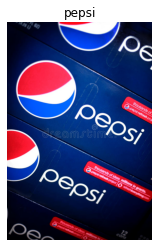

In [24]:
view_random_image(target_dir='coke_and_pepsi_all_images/Train/', target_class='pepsi')

['IMG015.jpg']
Image Shape =(900, 600, 3)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

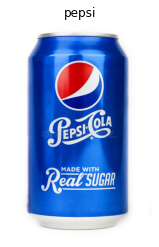

In [25]:
view_random_image(target_dir='coke_and_pepsi_all_images/Train/', target_class='pepsi')

['IMG050.jpg']
Image Shape =(455, 800, 3)


array([[[155, 146, 147],
        [151, 147, 146],
        [148, 147, 145],
        ...,
        [199, 143, 192],
        [204, 150, 199],
        [210, 157, 209]],

       [[154, 150, 149],
        [152, 148, 147],
        [149, 147, 148],
        ...,
        [150,  92, 143],
        [162, 105, 156],
        [163, 106, 159]],

       [[150, 149, 147],
        [151, 149, 150],
        [151, 149, 150],
        ...,
        [197, 129, 186],
        [206, 141, 195],
        [209, 146, 199]],

       ...,

       [[191,   3,   1],
        [193,   0,   1],
        [200,   2,   3],
        ...,
        [238, 236, 224],
        [237, 237, 225],
        [239, 239, 227]],

       [[190,   2,   0],
        [194,   2,   1],
        [197,   1,   2],
        ...,
        [235, 235, 223],
        [238, 238, 226],
        [238, 238, 226]],

       [[189,   4,   1],
        [195,   3,   2],
        [196,   0,   1],
        ...,
        [233, 235, 222],
        [236, 238, 225],
        [239, 239, 227]]

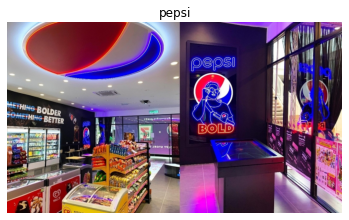

In [26]:
view_random_image(target_dir='coke_and_pepsi_all_images/Train/', target_class='pepsi')

['IMG002.jpg']
Image Shape =(3024, 4032, 3)


array([[[ 96,  95,  93],
        [ 95,  94,  92],
        [ 92,  91,  89],
        ...,
        [ 42,  40,  43],
        [ 41,  39,  42],
        [ 40,  38,  41]],

       [[ 96,  95,  93],
        [ 95,  94,  92],
        [ 91,  90,  88],
        ...,
        [ 35,  33,  36],
        [ 37,  35,  38],
        [ 43,  41,  44]],

       [[ 99,  98,  96],
        [ 98,  97,  95],
        [ 94,  93,  91],
        ...,
        [ 34,  32,  33],
        [ 37,  35,  38],
        [ 43,  41,  44]],

       ...,

       [[246, 243, 236],
        [245, 242, 235],
        [248, 243, 237],
        ...,
        [183, 179, 170],
        [184, 180, 171],
        [185, 180, 174]],

       [[246, 243, 238],
        [245, 242, 237],
        [246, 243, 236],
        ...,
        [183, 179, 170],
        [183, 178, 172],
        [182, 177, 171]],

       [[247, 244, 239],
        [246, 243, 238],
        [247, 244, 237],
        ...,
        [183, 178, 172],
        [184, 179, 173],
        [183, 178, 172]]

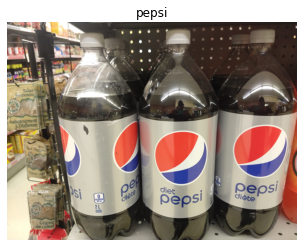

In [27]:
view_random_image(target_dir='coke_and_pepsi_all_images/Train/', target_class='pepsi')

['IMG076.jpg']
Image Shape =(720, 1280, 3)
['IMG021.jpg']
Image Shape =(270, 186, 3)


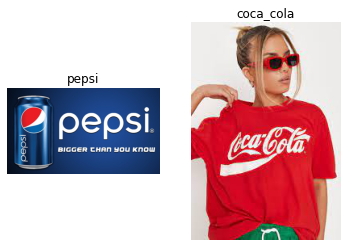

In [46]:
def compare_images():
  plt.figure()
  plt.subplot(1, 2, 1)
  pepsi_image = view_random_image(target_dir='coke_and_pepsi_all_images/Train/', target_class='pepsi')
  plt.subplot(1, 2, 2)
  coke_image = view_random_image(target_dir='coke_and_pepsi_all_images/Train/', target_class='coca_cola')
  plt.show()
compare_images()

['IMG053.jpg']
Image Shape =(2400, 2400, 3)
['IMG046.jpg']
Image Shape =(900, 1200, 3)


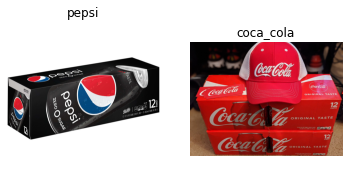

In [47]:
compare_images()

['IMG044.jpg']
Image Shape =(957, 1300, 3)
['IMG095.jpg']
Image Shape =(405, 612, 3)


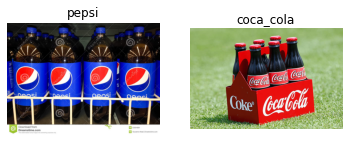

In [48]:
compare_images()

['IMG079.jpg']
Image Shape =(320, 800, 3)
['IMG029.jpg']
Image Shape =(1333, 2000, 3)


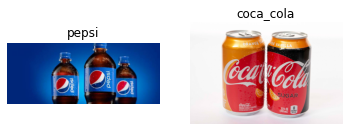

In [49]:
compare_images()

['IMG043.jpg']
Image Shape =(981, 736, 3)
['IMG058.jpg']
Image Shape =(751, 500, 3)


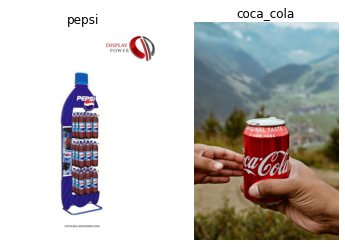

In [50]:
compare_images()

['IMG090.jpg']
Image Shape =(1000, 2000, 3)
['IMG086.jpg']
Image Shape =(9280, 6960, 3)


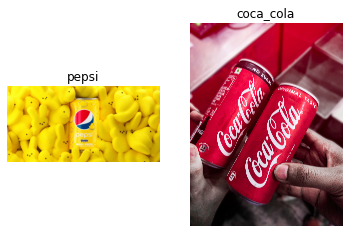

In [51]:
compare_images()

['IMG031.jpg']
Image Shape =(1600, 844, 3)
['IMG043.jpg']
Image Shape =(1200, 1200, 3)


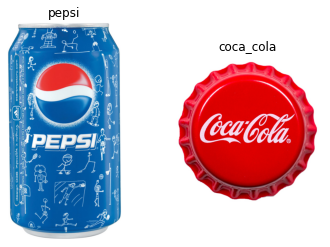

In [52]:
compare_images()

# Get our data ready with preprocessing  

In [56]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                label_mode='binary',
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                               label_mode='binary',
                                                               image_size=IMG_SIZE,
                                                               batch_size=BATCH_SIZE)


Found 198 files belonging to 2 classes.
Found 40 files belonging to 2 classes.


In [57]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [58]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [59]:
train_data.class_names

['coca_cola', 'pepsi']

In [60]:
test_data.class_names

['Pepsi', 'coca_cola']

# Get an idea of the workflow for the models 

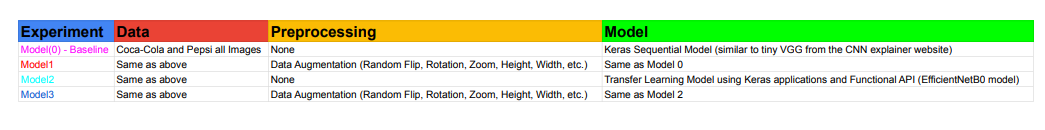

We'll start with a basic Sequential Model with no data augmentation, then we'll try adding data augmentation and see what happens. Then for Model 2 we'll see if we can leverage the power of transfer learning using a state-of-the-art model trained on ImageNet in order to improve our model dramatically. Then we'll add data augmentation to the same model to see if we get improvements or not.  

# Build Model 0 (Base Model)

Model 0 will be based on the **Tiny VGG** with normilization built right in as a layer with `tf.keras.layers.Rescaling`

In [63]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation, Rescaling
from tensorflow.keras.optimizers import Adam

# Build the model
def base_model():
  model_0 = Sequential([
  Rescaling(1.0/255),                      
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         input_shape=(224, 224, 3)),
  Activation(activation='relu'),
  Conv2D(filters=10,
         kernel_size=3,
         strides=1),
  Activation(activation='relu'),
  MaxPool2D(),
  Conv2D(filters=10,
         kernel_size=3,
         strides=1),
  Activation(activation='relu'),
  Conv2D(filters=10,
         kernel_size=3,
         strides=1),
  Activation(activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')       
  ])
  return model_0

base_model_0 = base_model()

# Compile the model 
base_model_0.compile(loss='binary_crossentropy',
                     optimizer=Adam(learning_rate=0.001),
                     metrics=['accuracy'])


In [64]:
base_model_0.layers

## Fit the Model

In [65]:
history_0 = base_model_0.fit(train_data, 
                 epochs=10,
                 steps_per_epoch=len(train_data),
                 validation_data=test_data,
                 validation_steps=len(test_data),
                 callbacks=[create_tensorboard_callback(dir_name='pepsi_coke_models',
                                                        experiment_name='base_model_0')])


Saving TensorBoard log files to: pepsi_coke_models/base_model_0/20220312-084953
Epoch 1/10
7/7 [==============================] - 27s 2s/step - loss: 0.7006 - accuracy: 0.5101 - val_loss: 0.8470 - val_accuracy: 0.4750
Epoch 2/10
7/7 [==============================] - 26s 2s/step - loss: 0.5709 - accuracy: 0.8030 - val_loss: 1.0923 - val_accuracy: 0.2250
Epoch 3/10
7/7 [==============================] - 26s 2s/step - loss: 0.3870 - accuracy: 0.8485 - val_loss: 2.7146 - val_accuracy: 0.3250
Epoch 4/10
7/7 [==============================] - 24s 2s/step - loss: 0.4570 - accuracy: 0.8283 - val_loss: 2.4271 - val_accuracy: 0.1750
Epoch 5/10
7/7 [==============================] - 24s 2s/step - loss: 0.3040 - accuracy: 0.8788 - val_loss: 2.4431 - val_accuracy: 0.1250
Epoch 6/10
7/7 [==============================] - 26s 2s/step - loss: 0.2813 - accuracy: 0.9242 - val_loss: 2.8864 - val_accuracy: 0.1000
Epoch 7/10
7/7 [==============================] - 24s 2s/step - loss: 0.2400 - accuracy: 0.9

In [62]:
base_model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 activation_1 (Activation)   (None, 220, 220, 10)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                        

In [66]:
base_model_0.evaluate(test_data)

2/2 [==============================] - 3s 140ms/step - loss: 3.3191 - accuracy: 0.0500


[3.319084644317627, 0.05000000074505806]

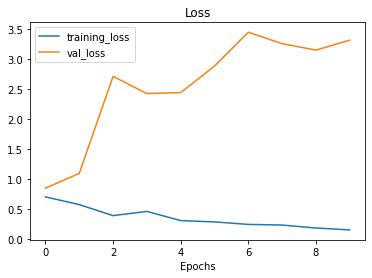

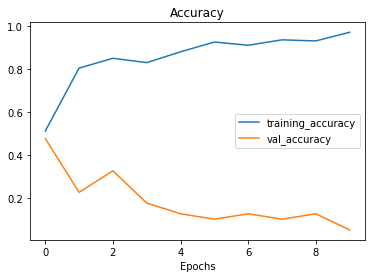

In [67]:
plot_loss_curves(history=history_0)

It looks like our model is very badly **overfitting** as it is doing well on the training data but very poorly on unseen test data. This could be an indication of a model that is too **complex** for the problem at hand so let's try reducing the number of layers in the model before we continue on with data augmentation.  